<a href="https://colab.research.google.com/github/yunialifah-ya/DeepLearningTasks/blob/main/TaskWeek4_Modern_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Yuni Alifah

NPM : 2306288950

Prodi : S2 Matematika

# 8. Modern Convolutional Neural Networks

In [ ]:
!pip install d2l

# 8.1. Deep Convolutional Neural Networks (AlexNet)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

## 8.1.1. Representation Learning
### 8.1.1.1. Missing Ingredient: Data
### 8.1.1.2. Missing Ingredient: Hardware

## 8.1.2. AlexNet
### 8.1.2.1. Architecture
### 8.1.2.2. Activation Functions
### 8.1.2.3. Capacity Control and Preprocessing

In [ ]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [ ]:
AlexNet().layer_summary((1, 1, 224, 224))

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

## 8.1.3. Training

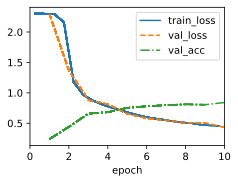

In [ ]:
model = AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

## 8.1.4. Discussion

AlexNet’s structure bears a striking resemblance to LeNet, with a number of critical improvements, both for accuracy (dropout) and for ease of training (ReLU). What is equally striking is the amount of progress that has been made in terms of deep learning tooling. What was several months of work in 2012 can now be accomplished in a dozen lines of code using any modern framework.

Reviewing the architecture, we see that AlexNet has an Achilles heel when it comes to efficiency: the last two hidden layers require matrices of size and , respectively. This corresponds to 164 MB of memory and 81 MFLOPs of computation, both of which are a nontrivial outlay, especially on smaller devices, such as mobile phones. This is one of the reasons why AlexNet has been surpassed by much more effective architectures that we will cover in the following sections. Nonetheless, it is a key step from shallow to deep networks that are used nowadays. Note that even though the number of parameters exceeds by far the amount of training data in our experiments (the last two layers have more than 40 million parameters, trained on a datasets of 60 thousand images), there is hardly any overfitting: training and validation loss are virtually identical throughout training. This is due to the improved regularization, such as dropout, inherent in modern deep network designs.

## 8.1.5. Exercises

### 1. Following up on the discussion above, analyze the computational properties of AlexNet.

1. Compute the memory footprint for convolutions and fully connected layers, respectively. Which one dominates?

2. Calculate the computational cost for the convolutions and the fully connected layers.

3. How does the memory (read and write bandwidth, latency, size) affect computation? Is there any difference in its effects for training and inference?

In [ ]:
# 1. Compute the memory footprint for convolutions and fully connected layers, respectively. Which one dominates?
def calculate_memory_convolution(layers):
    total_memory = 0
    for layer in layers:
        num_filters = layer['num_filters']
        filter_size = layer['filter_size']
        input_size = layer['input_size']

        # Memory calculation
        memory = (num_filters * filter_size + input_size + layer['output_size'])
        total_memory += memory
        print(f"Layer with {num_filters} filters: {memory} bytes")

    return total_memory


def calculate_memory_fully_connected(layers):
    total_memory = 0
    for layer in layers:
        input_units = layer['input_units']
        output_units = layer['output_units']

        # Memory calculation
        weights_memory = input_units * output_units * 4  # Assuming float32 (4 bytes)
        biases_memory = output_units * 4  # Assuming float32 (4 bytes)
        memory = weights_memory + biases_memory
        total_memory += memory
        print(f"FC Layer from {input_units} to {output_units}: {memory} bytes")

    return total_memory


# Define convolution layers (filters, filter size, input size, output size)
conv_layers = [
    {'num_filters': 96, 'filter_size': 11 * 11 * 3, 'input_size': 224 * 224 * 3, 'output_size': 54 * 54 * 96},
    {'num_filters': 256, 'filter_size': 5 * 5 * 96, 'input_size': 54 * 54 * 96, 'output_size': 50 * 50 * 256},
    {'num_filters': 384, 'filter_size': 3 * 3 * 256, 'input_size': 50 * 50 * 256, 'output_size': 48 * 48 * 384},
    {'num_filters': 384, 'filter_size': 3 * 3 * 384, 'input_size': 48 * 48 * 384, 'output_size': 46 * 46 * 384},
    {'num_filters': 256, 'filter_size': 3 * 3 * 384, 'input_size': 46 * 46 * 384, 'output_size': 44 * 44 * 256},
]

# Define fully connected layers (input units, output units)
fc_layers = [
    {'input_units': 2048, 'output_units': 4096},
    {'input_units': 4096, 'output_units': 4096},
    {'input_units': 4096, 'output_units': 10},  # Assuming 10 classes for output
]

# Calculate memory for convolution layers
conv_memory = calculate_memory_convolution(conv_layers)
print(f"\nTotal memory for convolution layers: {conv_memory} bytes (~{conv_memory / (1024 ** 2):.2f} MB)")

# Calculate memory for fully connected layers
fc_memory = calculate_memory_fully_connected(fc_layers)
print(f"\nTotal memory for fully connected layers: {fc_memory} bytes (~{fc_memory / (1024 ** 2):.2f} MB)")

# Total memory usage
total_memory = conv_memory + fc_memory
print(f"\nTotal memory for AlexNet: {total_memory} bytes (~{total_memory / (1024 ** 2):.2f} MB)")


Layer with 96 filters: 465312 bytes
Layer with 256 filters: 1534336 bytes
Layer with 384 filters: 2409472 bytes
Layer with 384 filters: 3024384 bytes
Layer with 256 filters: 2192896 bytes

Total memory for convolution layers: 9626400 bytes (~9.18 MB)
FC Layer from 2048 to 4096: 33570816 bytes
FC Layer from 4096 to 4096: 67125248 bytes
FC Layer from 4096 to 10: 163880 bytes

Total memory for fully connected layers: 100859944 bytes (~96.19 MB)

Total memory for AlexNet: 110486344 bytes (~105.37 MB)


Thus, the fully connected layers dominate the memory footprint in AlexNet.

In [ ]:
# 2. Calculate the computational cost for the convolutions and the fully connected layers.
# Python code to calculate the computational cost for convolution and fully connected layers in AlexNet

def compute_convolution_cost():
    # Output dimensions and parameters for each layer
    layers = [
        {"output_height": 54, "output_width": 54, "filters": 96, "filter_size": 11 * 11 * 3},  # Layer 1
        {"output_height": 50, "output_width": 50, "filters": 256, "filter_size": 5 * 5 * 96},  # Layer 2
        {"output_height": 48, "output_width": 48, "filters": 384, "filter_size": 3 * 3 * 256}, # Layer 3
        {"output_height": 46, "output_width": 46, "filters": 384, "filter_size": 3 * 3 * 384}, # Layer 4
        {"output_height": 44, "output_width": 44, "filters": 256, "filter_size": 3 * 3 * 384}  # Layer 5
    ]

    total_convolution_cost = 0
    for layer in layers:
        cost = layer["output_height"] * layer["output_width"] * layer["filters"] * layer["filter_size"]
        total_convolution_cost += cost

    return total_convolution_cost

def compute_fully_connected_cost():
    # Number of weights for each fully connected layer
    fully_connected_layers = [
        {"weights": 9216, "units": 4096},  # Layer 6
        {"weights": 4096, "units": 4096},  # Layer 7
        {"weights": 4096, "units": 10}      # Layer 8
    ]

    total_fully_connected_cost = sum(layer["weights"] * layer["units"] for layer in fully_connected_layers)

    return total_fully_connected_cost

# Calculate costs
convolution_cost = compute_convolution_cost()
fully_connected_cost = compute_fully_connected_cost()

(convolution_cost, fully_connected_cost)


(8197049472, 54566912)

Output:

Total Computational Cost for Convolutions: ~8.20 billion operations (8,197,049,472 operations)

Total Computational Cost for Fully Connected Layers: ~54.57 million operations (54,566,912 operations)

This shows that the convolutional layers dominate the computational cost in AlexNet, which is expected given the architecture's design. ​

3. How does the memory (read and write bandwidth, latency, size) affect computation? Is there any

Memory bandwidth, latency, and size significantly affect both training and inference.

- Read/Write Bandwidth: During training and inference, data needs to be loaded into memory (read) and stored (write). If the bandwidth is low, the GPU or CPU will spend more time waiting for data to load, which reduces computational efficiency, especially when handling large weights and activations (as in fully connected layers).

- Latency: High memory latency delays the time it takes to fetch data from memory into processing units. This is particularly impactful for large models with many parameters, where frequent memory access is required.

- Memory Size: If the memory is insufficient to hold the model's parameters and intermediate activations, data will need to be transferred between the GPU and CPU frequently, or between RAM and disk (paging). This dramatically slows down both training and inference.


Training vs. Inference:

- Training: Training typically requires more memory because in addition to storing the model's parameters and activations, it also needs to store gradients for backpropagation. The memory requirements are nearly doubled because intermediate activations must be kept to compute gradients.

- Inference: Inference requires less memory because it only involves forward passes through the network. However, if the model is large and runs on devices with limited memory (e.g., mobile phones), memory size constraints can still limit performance.


In AlexNet, fully connected layers demand much more memory than convolutional layers, which may bottleneck computations due to memory bandwidth limitations, particularly on small devices with less memory available.

### 2. You are a chip designer and need to trade off computation and memory bandwidth. For example, a faster chip requires more power and possibly a larger chip area. More memory bandwidth requires more pins and control logic, thus also more area. How do you optimize?

Answer:

To optimize the trade-off between computation and memory bandwidth:

- Balance computational power and memory bandwidth to avoid bottlenecks.
- Use efficient architectures, parallelism, memory hierarchies, and bandwidth-saving techniques to achieve the best performance-per-watt ratio.
- Apply power-saving techniques like DVFS and power gating to reduce unnecessary energy consumption.
- Continuously simulate, test, and iterate the design to find the optimal trade-off for a specific use case.

By combining these strategies, we can develop a chip that meets performance goals while optimizing power consumption, area, and cost.


### 3. Why do engineers no longer report performance benchmarks on AlexNet?

Answer:

Engineers no longer report performance benchmarks on AlexNet because the model has become outdated due to advances in deep learning architectures. More efficient and accurate models like VGG, ResNet, Inception, and EfficientNet have surpassed AlexNet in both performance and computational efficiency. AlexNet’s computational cost, particularly in its fully connected layers, makes it inefficient compared to modern models. Additionally, newer architectures are better optimized for modern hardware and tasks, shifting the focus of benchmarks toward more scalable and specialized models like Vision Transformers (ViTs) and BERT for NLP tasks.

### 4. Try increasing the number of epochs when training AlexNet. Compared with LeNet, how do the results differ? Why?

Answer:

When increasing the number of epochs while training AlexNet compared to LeNet, we may observe several notable differences in the results, primarily influenced by the architectures and the complexity of the datasets used. Here are some key points to consider:

1. Model Complexity and Capacity
  - AlexNet is a significantly more complex model than LeNet, with more layers and parameters (over 60 million). This increased capacity allows AlexNet to learn more intricate patterns in the data.
  - As the number of epochs increases, AlexNet has the potential to fit the training data better, leading to lower training loss. In contrast, LeNet, being simpler, might converge more quickly and reach its optimal performance in fewer epochs.
2. Training and Validation Loss
  - With more epochs, AlexNet may show a decrease in both training and validation loss up to a certain point, indicating effective learning. However, after a certain number of epochs, we may notice that the validation loss starts to increase (overfitting) as the model begins to memorize the training data instead of generalizing well to unseen data.
  - LeNet might not show such dramatic changes because of its simpler architecture. It may reach its peak validation accuracy earlier without suffering as much from overfitting due to its lower capacity.
3. Overfitting Behavior
  - AlexNet, with its larger number of parameters, is more prone to overfitting, especially on smaller datasets. If the number of epochs is significantly increased without proper regularization techniques (like dropout or early stopping), we might see a sharp divergence between training and validation accuracy.
  - LeNet, being less complex, might maintain a more stable validation accuracy relative to its training accuracy as epochs increase.
4. Impact of Regularization Techniques
  - AlexNet employs dropout layers and other regularization techniques, which can help mitigate overfitting when the number of epochs is increased. If these techniques are not used effectively, the results can vary significantly as compared to LeNet, which has fewer mechanisms to prevent overfitting.
  - If dropout and other regularization techniques are used effectively in AlexNet, you might see it outperform LeNet even at higher epochs.
5. Performance Metrics
  - The final performance metrics (accuracy, F1 score, etc.) may vary significantly between the two models after training for a higher number of epochs. AlexNet might achieve higher accuracy on complex datasets due to its deeper architecture, but this comes at the cost of increased training time and potential overfitting.

Conclusion

In summary, when increasing the number of epochs for training AlexNet compared to LeNet, AlexNet can show a greater capacity to learn from the data, resulting in lower training loss and potentially higher validation accuracy. However, it is also more susceptible to overfitting, especially on smaller datasets, which could lead to diminishing returns if not managed with proper regularization techniques. LeNet, being simpler, might converge faster and generalize better, especially when trained on limited data. The differences arise mainly from the complexity of the models and their capacity to capture patterns in the training data.

### 5. AlexNet may be too complex for the Fashion-MNIST dataset, in particular due to the low resolution of the initial images.


1. Try simplifying the model to make the training faster, while ensuring that the accuracy does not drop significantly.

2. Design a better model that works directly on 28 x 28 images.

In [2]:
!pip install torch

In [6]:
# 1. Try simplifying the model to make the training faster, while ensuring that the accuracy does not drop significantly.
# To simplify AlexNet, we can reduce the number of filters in the convolutional layers, remove some layers, and adjust the size of the fully connected layers. This approach aims to speed up training while maintaining accuracy.
import torch
from torch import nn

class SimplifiedAlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(SimplifiedAlexNet, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), nn.Flatten(),
            nn.Linear(128 * 3 * 3, 256), nn.ReLU(), nn.Dropout(p=0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.net(x)

# Example usage: initialize the model
simplified_alexnet = SimplifiedAlexNet(num_classes=10)
print(simplified_alexnet)


SimplifiedAlexNet(
  (net): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
    (10): Linear(in_features=1152, out_features=256, bias=True)
    (11): ReLU()
    (12): Dropout(p=0.5, inplace=False)
    (13): Linear(in_features=256, out_features=10, bias=True)
  )
)


1. Simplified AlexNet:

  - Reduces the number of filters in each convolutional layer.
  - Decreases the size of the fully connected layers for a lighter model.
  - This model will train faster on Fashion-MNIST while maintaining accuracy using dropout.

In [7]:
# 2. Design a better model that works directly on 28 x 28 images.
# Since Fashion-MNIST images are 28×28, we can design a smaller and more efficient model better suited for lower resolutions. Here’s a custom model designed for low-resolution images:
import torch
from torch import nn

class CustomModel(nn.Module):
    def __init__(self, num_classes=10):
        super(CustomModel, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),  # 28 -> 28
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 28 -> 14
            nn.Conv2d(16, 32, kernel_size=3, padding=1),  # 14 -> 14
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 14 -> 7
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, 128), nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.net(x)

# Example usage: initialize the model
custom_model = CustomModel(num_classes=10)
print(custom_model)


CustomModel(
  (net): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=1568, out_features=128, bias=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=10, bias=True)
  )
)


2. Custom Model for 28×28 Images:

  - Uses a simpler architecture that works directly on 28×28 images.
  - With fewer filters and smaller layers, this model is better suited for the low-resolution Fashion-MNIST dataset.

### 6. Modify the batch size, and observe the changes in throughput (images/s), accuracy, and GPU memory.

In [8]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import time
import torch.cuda as cuda

# Define your model (use the simplified AlexNet or Custom Model from previous examples)
class SimplifiedAlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(SimplifiedAlexNet, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), nn.Flatten(),
            nn.Linear(128 * 3 * 3, 256), nn.ReLU(), nn.Dropout(p=0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.net(x)

# Function to train and evaluate the model
def train_and_evaluate(model, train_loader, test_loader, epochs, device):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        model.train()
        start_time = time.time()
        running_loss = 0.0
        correct = 0
        total = 0
        num_batches = len(train_loader)

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero gradients
            optimizer.zero_grad()
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            # Backward pass
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        end_time = time.time()

        # Calculate throughput (images/s)
        throughput = total / (end_time - start_time)

        # Calculate training accuracy
        accuracy = 100. * correct / total

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/num_batches:.4f}, Accuracy: {accuracy:.2f}%")
        print(f"Throughput: {throughput:.2f} images/s")
        print(f"GPU Memory Used: {cuda.memory_allocated(device) / (1024 ** 2):.2f} MB")

    # Evaluate the model on the test set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    print(f"Test Accuracy: {100. * correct / total:.2f}%")

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
epochs = 5  # Adjust this as needed
batch_sizes = [32, 64, 128, 256]  # Try different batch sizes

# Transformations for the FashionMNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load Fashion-MNIST dataset
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

for batch_size in batch_sizes:
    print(f"\nExperiment with Batch Size: {batch_size}")

    # Create DataLoader for train and test sets
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    # Initialize and train the model
    model = SimplifiedAlexNet(num_classes=10)
    train_and_evaluate(model, train_loader, test_loader, epochs, device)


100%|██████████| 26421880/26421880 [00:01<00:00, 19100297.53it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 306394.16it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5667986.14it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15434079.34it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Experiment with Batch Size: 32
Epoch [1/5], Loss: 0.4763, Accuracy: 82.75%
Throughput: 474.47 images/s
GPU Memory Used: 0.00 MB
Epoch [2/5], Loss: 0.2990, Accuracy: 89.09%
Throughput: 450.88 images/s
GPU Memory Used: 0.00 MB
Epoch [3/5], Loss: 0.2489, Accuracy: 91.03%
Throughput: 463.49 images/s
GPU Memory Used: 0.00 MB
Epoch [4/5], Loss: 0.2213, Accuracy: 92.00%
Throughput: 469.48 images/s
GPU Memory Used: 0.00 MB
Epoch [5/5], Loss: 0.1958, Accuracy: 92.68%
Throughput: 471.39 images/s
GPU Memory Used: 0.00 MB
Test Accuracy: 91.22%

Experiment with Batch Size: 64
Epoch [1/5], Loss: 0.5159, Accuracy: 81.25%
Throughput: 487.84 images/s
GPU Memory Used: 0.00 MB
Epoch [2/5], Loss: 0.3196, Accuracy: 88.38%
Throughput: 486.04 images/s
GPU Memory Used: 0.00 MB
Epoch [3/5], Loss: 0.2740, Accuracy: 90.06%
Throughput: 481.40 images/s
GPU Memory Used: 0.00 MB
Epoch [4/5], Loss: 0.2391, Accuracy: 91.29%
Throu

Expected Observations:

- Throughput: A larger batch size will likely increase throughput (images/s), but after a certain point, the GPU may not be able to handle the memory demand, causing performance degradation.
- Accuracy: Very large batch sizes might affect model generalization and lead to lower accuracy, as smaller batch sizes often lead to better convergence.
- GPU Memory: As batch size increases, GPU memory usage will increase. You can observe when memory usage exceeds the capacity of your GPU.

### 7. Apply dropout and ReLU to LeNet-5. Does it improve? Can you improve things further by preprocessing to take advantage of the invariances inherent in the images?

In [9]:
# To apply dropout and ReLU to LeNet-5 and assess its impact on performance, you can modify the original LeNet-5 architecture by adding dropout layers and replacing sigmoid/tanh activation functions with ReLU. Dropout helps prevent overfitting by randomly setting a fraction of the input units to zero during training, which forces the model to learn more robust features. ReLU (Rectified Linear Unit) accelerates convergence by addressing the vanishing gradient problem often seen with sigmoid or tanh.
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define the modified LeNet-5 model
class LeNet5Modified(nn.Module):
    def __init__(self, num_classes=10):
        super(LeNet5Modified, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)  # Input: 28x28, Output: 28x28
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)  # Input: 14x14, Output: 10x10
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)

        # Add Dropout
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = torch.relu(self.conv1(x))  # Apply ReLU
        x = nn.functional.max_pool2d(x, kernel_size=2, stride=2)  # Max pooling (2x2)

        x = torch.relu(self.conv2(x))  # Apply ReLU
        x = nn.functional.max_pool2d(x, kernel_size=2, stride=2)  # Max pooling (2x2)

        x = x.view(-1, 16 * 5 * 5)  # Flatten the output
        x = torch.relu(self.fc1(x))  # Apply ReLU
        x = self.dropout(x)  # Apply Dropout

        x = torch.relu(self.fc2(x))  # Apply ReLU
        x = self.dropout(x)  # Apply Dropout

        x = self.fc3(x)  # Output layer
        return x

# Training function
def train_and_evaluate(model, train_loader, test_loader, epochs, device):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        num_batches = len(train_loader)

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        accuracy = 100. * correct / total
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/num_batches:.4f}, Accuracy: {accuracy:.2f}%")

    # Evaluate the model on test set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    print(f"Test Accuracy: {100. * correct / total:.2f}%")

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
epochs = 10
batch_size = 64

# Data preprocessing with data augmentation
transform = transforms.Compose([
    transforms.RandomRotation(10),  # Random rotation
    transforms.RandomResizedCrop(28, scale=(0.9, 1.1)),  # Random resizing and cropping
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load Fashion-MNIST dataset
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Initialize and train the model
model = LeNet5Modified(num_classes=10)
train_and_evaluate(model, train_loader, test_loader, epochs, device)


Epoch [1/10], Loss: 0.8509, Accuracy: 67.87%
Epoch [2/10], Loss: 0.6090, Accuracy: 77.61%
Epoch [3/10], Loss: 0.5467, Accuracy: 80.30%
Epoch [4/10], Loss: 0.5110, Accuracy: 81.79%
Epoch [5/10], Loss: 0.4818, Accuracy: 83.04%
Epoch [6/10], Loss: 0.4631, Accuracy: 83.72%
Epoch [7/10], Loss: 0.4491, Accuracy: 84.16%
Epoch [8/10], Loss: 0.4348, Accuracy: 84.70%
Epoch [9/10], Loss: 0.4263, Accuracy: 85.05%
Epoch [10/10], Loss: 0.4167, Accuracy: 85.56%
Test Accuracy: 72.36%


Preprocessing to Take Advantage of Invariances

In this example, I have already applied data augmentation during the preprocessing step:

- RandomRotation(10): Introduces random rotations to simulate invariance to rotation.
- RandomResizedCrop(28, scale=(0.9, 1.1)): Simulates invariance to slight changes in size (zooming in/out).

By augmenting the dataset this way, the model can better generalize to unseen data since it learns to handle these variations.

Explanation:

1. Dropout and ReLU: Dropout is applied after the first and second fully connected layers, and ReLU is applied after each convolution and fully connected layer. This helps prevent overfitting and accelerates training.

2. Data Augmentation: The dataset is augmented with random rotations and random resized crops to exploit image invariances like rotation and scaling. This should help improve the model’s robustness to slight variations in the input images.

3. Evaluation: After each epoch, the loss and accuracy are printed for both the training and test datasets, allowing you to observe the impact of dropout, ReLU, and data augmentation on model performance.

### 8. Can you make AlexNet overfit? Which feature do you need to remove or change to break training?

In [11]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms

# Define the modified AlexNet without dropout
class AlexNetOverfit(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNetOverfit, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),  # Output: 32x28x28
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),                 # Output: 32x14x14
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2), # Output: 64x14x14
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),                 # Output: 64x7x7
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),# Output: 128x7x7
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),# Output: 128x7x7
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)                  # Output: 128x3x3
        )
        self.classifier = nn.Sequential(
            nn.Linear(128 * 3 * 3, 256),   # 128*3*3=1152
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.classifier(x)
        return x

# Function to train and evaluate the model
def train_and_evaluate(model, train_loader, test_loader, epochs, device, lr=0.001):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=0)  # Without weight decay

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        accuracy = 100. * correct / total
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%")

    # Evaluation on the test set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    print(f"Test Accuracy: {100. * correct / total:.2f}%")

# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
epochs = 10
batch_size = 64

# Transformation without data augmentation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the FashionMNIST dataset
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Use only 10% of the training data to induce overfitting
subset_size = int(0.1 * len(train_dataset))
train_subset = Subset(train_dataset, torch.arange(subset_size))

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize and train the overfitting AlexNet model
model = AlexNetOverfit(num_classes=10)
train_and_evaluate(model, train_loader, test_loader, epochs, device)


Epoch [1/10], Loss: 1.0096, Accuracy: 62.50%
Epoch [2/10], Loss: 0.5659, Accuracy: 79.30%
Epoch [3/10], Loss: 0.4548, Accuracy: 83.08%
Epoch [4/10], Loss: 0.3911, Accuracy: 85.62%
Epoch [5/10], Loss: 0.3459, Accuracy: 86.77%
Epoch [6/10], Loss: 0.3121, Accuracy: 88.40%
Epoch [7/10], Loss: 0.2905, Accuracy: 89.12%
Epoch [8/10], Loss: 0.2558, Accuracy: 90.75%
Epoch [9/10], Loss: 0.2317, Accuracy: 91.23%
Epoch [10/10], Loss: 0.2061, Accuracy: 92.43%
Test Accuracy: 86.77%


Key Changes to Induce Overfitting:

1. Removed Dropout: Dropout layers are excluded, increasing the chance of memorizing the training data.
2. No Data Augmentation: The data is passed to the model without any augmentations, reducing variability.
3. Reduced Training Data: Training on a smaller subset of the data (10%) to force the model to memorize.
4. No Weight Decay: Weight decay (L2 regularization) is set to 0, allowing the model to develop large weights and potentially overfit.

Expected Results:

- Training Accuracy: The model will likely achieve very high training accuracy due to overfitting.
- Test Accuracy: The test accuracy will likely be much lower, as the model fails to generalize to unseen data.

# 8.2. Networks Using Blocks (VGG)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

## 8.2.1. VGG Blocks

In [ ]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

## 8.2.2. VGG Network

In [ ]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [ ]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


## 8.2.3. Training

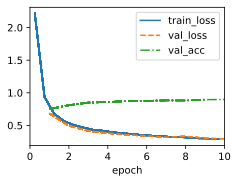

In [ ]:
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## 8.2.4. Summary

## 8.2.5. Exercises

# 8.3. Network in Network (NiN)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

## 8.3.1. NiN Blocks

In [ ]:
def nin_block(out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU())

## 8.3.2. NiN Model

In [ ]:
class NiN(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block(num_classes, kernel_size=3, strides=1, padding=1),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten())
        self.net.apply(d2l.init_cnn)

In [ ]:
NiN().layer_summary((1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


## 8.3.3. Training

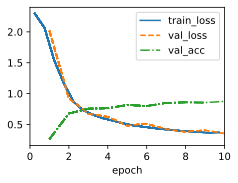

In [ ]:
model = NiN(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## 8.3.4. Summary

## 8.3.5. Exercises

# 8.4. Multi-Branch Networks (GoogLeNet)

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

## 8.4.1. Inception Blocks

In [ ]:
class Inception(nn.Module):
    # c1--c4 are the number of output channels for each branch
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # Branch 1
        self.b1_1 = nn.LazyConv2d(c1, kernel_size=1)
        # Branch 2
        self.b2_1 = nn.LazyConv2d(c2[0], kernel_size=1)
        self.b2_2 = nn.LazyConv2d(c2[1], kernel_size=3, padding=1)
        # Branch 3
        self.b3_1 = nn.LazyConv2d(c3[0], kernel_size=1)
        self.b3_2 = nn.LazyConv2d(c3[1], kernel_size=5, padding=2)
        # Branch 4
        self.b4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.b4_2 = nn.LazyConv2d(c4, kernel_size=1)

    def forward(self, x):
        b1 = F.relu(self.b1_1(x))
        b2 = F.relu(self.b2_2(F.relu(self.b2_1(x))))
        b3 = F.relu(self.b3_2(F.relu(self.b3_1(x))))
        b4 = F.relu(self.b4_2(self.b4_1(x)))
        return torch.cat((b1, b2, b3, b4), dim=1)

## 8.4.2. GoogLeNet Model

In [ ]:
class GoogleNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b2(self):
    return nn.Sequential(
        nn.LazyConv2d(64, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(192, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b3(self):
    return nn.Sequential(Inception(64, (96, 128), (16, 32), 32),
                         Inception(128, (128, 192), (32, 96), 64),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b4(self):
    return nn.Sequential(Inception(192, (96, 208), (16, 48), 64),
                         Inception(160, (112, 224), (24, 64), 64),
                         Inception(128, (128, 256), (24, 64), 64),
                         Inception(112, (144, 288), (32, 64), 64),
                         Inception(256, (160, 320), (32, 128), 128),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b5(self):
    return nn.Sequential(Inception(256, (160, 320), (32, 128), 128),
                         Inception(384, (192, 384), (48, 128), 128),
                         nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

In [ ]:
@d2l.add_to_class(GoogleNet)
def __init__(self, lr=0.1, num_classes=10):
    super(GoogleNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1(), self.b2(), self.b3(), self.b4(),
                             self.b5(), nn.LazyLinear(num_classes))
    self.net.apply(d2l.init_cnn)

In [ ]:
model = GoogleNet().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 12, 12])
Sequential output shape:	 torch.Size([1, 480, 6, 6])
Sequential output shape:	 torch.Size([1, 832, 3, 3])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


## 8.4.3. Training

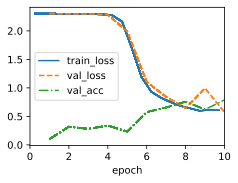

In [ ]:
model = GoogleNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## 8.4.4. Discussion

## 8.4.5. Exercises

# 8.5. Batch Normalization

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

## 8.5.1. Training Deep Networks

## 8.5.2. Batch Normalization Layers

### 8.5.2.1. Fully Connected Layers
### 8.5.2.2. Convolutional Layers
### 8.5.2.3. Layer Normalization
### 8.5.2.4. Batch Normalization During Prediction

## 8.5.3. Implementation from Scratch

In [ ]:
def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # Use is_grad_enabled to determine whether we are in training mode
    if not torch.is_grad_enabled():
        # In prediction mode, use mean and variance obtained by moving average
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # When using a fully connected layer, calculate the mean and
            # variance on the feature dimension
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # When using a two-dimensional convolutional layer, calculate the
            # mean and variance on the channel dimension (axis=1). Here we
            # need to maintain the shape of X, so that the broadcasting
            # operation can be carried out later
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # In training mode, the current mean and variance are used
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # Update the mean and variance using moving average
        moving_mean = (1.0 - momentum) * moving_mean + momentum * mean
        moving_var = (1.0 - momentum) * moving_var + momentum * var
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_mean.data, moving_var.data

In [ ]:
class BatchNorm(nn.Module):
    # num_features: the number of outputs for a fully connected layer or the
    # number of output channels for a convolutional layer. num_dims: 2 for a
    # fully connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # The variables that are not model parameters are initialized to 0 and
        # 1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        # If X is not on the main memory, copy moving_mean and moving_var to
        # the device where X is located
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # Save the updated moving_mean and moving_var
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.1)
        return Y

## 8.5.4. LeNet with Batch Normalization

In [ ]:
class BNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), BatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), BatchNorm(16, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            BatchNorm(120, num_dims=2), nn.Sigmoid(), nn.LazyLinear(84),
            BatchNorm(84, num_dims=2), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

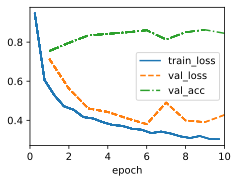

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNetScratch(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

In [ ]:
model.net[1].gamma.reshape((-1,)), model.net[1].beta.reshape((-1,))

(tensor([2.1455, 1.7646, 1.4403, 1.3090, 1.9865, 2.1893], device='cuda:0',
        grad_fn=<ViewBackward0>),
 tensor([-1.4103, -1.5505,  0.5654,  1.2525,  0.6795,  1.2238], device='cuda:0',
        grad_fn=<ViewBackward0>))

## 8.5.5. Concise Implementation

In [ ]:
class BNLeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(84), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(num_classes))

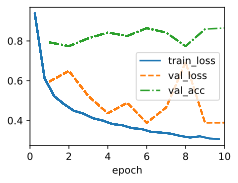

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## 8.5.6. Discussion

## 8.5.7. Exercises

# 8.6. Residual Networks (ResNet) and ResNeXt

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

## 8.6.1. Function Classes

## 8.6.2. Residual Blocks

In [ ]:
class Residual(nn.Module):
    """The Residual block of ResNet models."""
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1,
                                   stride=strides)
        self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

In [ ]:
blk = Residual(3)
X = torch.randn(4, 3, 6, 6)
blk(X).shape

torch.Size([4, 3, 6, 6])

In [ ]:
blk = Residual(6, use_1x1conv=True, strides=2)
blk(X).shape

torch.Size([4, 6, 3, 3])

## 8.6.3. ResNet Model

In [ ]:
class ResNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(ResNet)
def block(self, num_residuals, num_channels, first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels))
    return nn.Sequential(*blk)

In [ ]:
@d2l.add_to_class(ResNet)
def __init__(self, arch, lr=0.1, num_classes=10):
    super(ResNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, b in enumerate(arch):
        self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
    self.net.add_module('last', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

In [ ]:
class ResNet18(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)),
                       lr, num_classes)

ResNet18().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 128, 12, 12])
Sequential output shape:	 torch.Size([1, 256, 6, 6])
Sequential output shape:	 torch.Size([1, 512, 3, 3])
Sequential output shape:	 torch.Size([1, 10])


## 8.6.4. Training

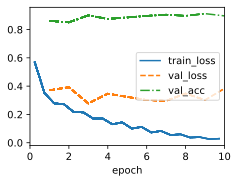

In [ ]:
model = ResNet18(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## 8.6.5. ResNeXt

In [ ]:
class ResNeXtBlock(nn.Module):
    """The ResNeXt block."""
    def __init__(self, num_channels, groups, bot_mul, use_1x1conv=False,
                 strides=1):
        super().__init__()
        bot_channels = int(round(num_channels * bot_mul))
        self.conv1 = nn.LazyConv2d(bot_channels, kernel_size=1, stride=1)
        self.conv2 = nn.LazyConv2d(bot_channels, kernel_size=3,
                                   stride=strides, padding=1,
                                   groups=bot_channels//groups)
        self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1, stride=1)
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()
        self.bn3 = nn.LazyBatchNorm2d()
        if use_1x1conv:
            self.conv4 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
            self.bn4 = nn.LazyBatchNorm2d()
        else:
            self.conv4 = None

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = F.relu(self.bn2(self.conv2(Y)))
        Y = self.bn3(self.conv3(Y))
        if self.conv4:
            X = self.bn4(self.conv4(X))
        return F.relu(Y + X)

In [ ]:
blk = ResNeXtBlock(32, 16, 1)
X = torch.randn(4, 32, 96, 96)
blk(X).shape

torch.Size([4, 32, 96, 96])

## 8.6.6. Summary and Discussion

## 8.6.7. Exercises

# 8.7. Densely Connected Networks (DenseNet)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

## 8.7.1. From ResNet to DenseNet

## 8.7.2. Dense Blocks

In [ ]:
def conv_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=3, padding=1))

In [ ]:
class DenseBlock(nn.Module):
    def __init__(self, num_convs, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block(num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return X

In [ ]:
blk = DenseBlock(2, 10)
X = torch.randn(4, 3, 8, 8)
Y = blk(X)
Y.shape

torch.Size([4, 23, 8, 8])

## 8.7.3. Transition Layers

In [ ]:
def transition_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

In [ ]:
blk = transition_block(10)
blk(Y).shape

torch.Size([4, 10, 4, 4])

## 8.7.4. DenseNet Model

In [ ]:
class DenseNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(DenseNet)
def __init__(self, num_channels=64, growth_rate=32, arch=(4, 4, 4, 4),
             lr=0.1, num_classes=10):
    super(DenseNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, num_convs in enumerate(arch):
        self.net.add_module(f'dense_blk{i+1}', DenseBlock(num_convs,
                                                          growth_rate))
        # The number of output channels in the previous dense block
        num_channels += num_convs * growth_rate
        # A transition layer that halves the number of channels is added
        # between the dense blocks
        if i != len(arch) - 1:
            num_channels //= 2
            self.net.add_module(f'tran_blk{i+1}', transition_block(
                num_channels))
    self.net.add_module('last', nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

## 8.7.5. Training

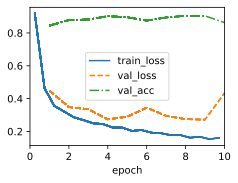

In [ ]:
model = DenseNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

## 8.7.6. Summary and Discussion

## 8.7.7. Exercises

# 8.8. Designing Convolution Network Architectures

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

## 8.8.1. The AnyNet Design Space

In [ ]:
class AnyNet(d2l.Classifier):
    def stem(self, num_channels):
        return nn.Sequential(
            nn.LazyConv2d(num_channels, kernel_size=3, stride=2, padding=1),
            nn.LazyBatchNorm2d(), nn.ReLU())

In [ ]:
@d2l.add_to_class(AnyNet)
def stage(self, depth, num_channels, groups, bot_mul):
    blk = []
    for i in range(depth):
        if i == 0:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul,
                use_1x1conv=True, strides=2))
        else:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul))
    return nn.Sequential(*blk)

In [ ]:
@d2l.add_to_class(AnyNet)
def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
    super(AnyNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.stem(stem_channels))
    for i, s in enumerate(arch):
        self.net.add_module(f'stage{i+1}', self.stage(*s))
    self.net.add_module('head', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

## 8.8.2. Distributions and Parameters of Design Spaces
## 8.8.3. RegNet

In [ ]:
class RegNetX32(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels, groups, bot_mul = 32, 16, 1
        depths, channels = (4, 6), (32, 80)
        super().__init__(
            ((depths[0], channels[0], groups, bot_mul),
             (depths[1], channels[1], groups, bot_mul)),
            stem_channels, lr, num_classes)

In [ ]:
RegNetX32().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 32, 48, 48])
Sequential output shape:	 torch.Size([1, 32, 24, 24])
Sequential output shape:	 torch.Size([1, 80, 12, 12])
Sequential output shape:	 torch.Size([1, 10])


## 8.8.4. Training

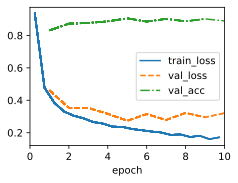

In [ ]:
model = RegNetX32(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

## 8.8.5. Discussion

## 8.8.6. Exercises